<a href="https://colab.research.google.com/github/SanyamOberoi/News_Classification/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center> News Classification</h1>

## Install TensorFlow, TensorFlow Model Garden and other packages

In [1]:
!pip install langdetect

     |████████████████████████████████| 983kB 5.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=624caa9b22bf8323de04c3779915ab3a9fd8df0a6711bdec40ef6ad82f1cd9c1
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.3.0


In [3]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2319/2319), done.
remote: Total 2650 (delta 511), reused 1351 (delta 298), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 34.15 MiB/s, done.
Resolving deltas: 100% (511/511), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [69]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 67.5MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=0b1da8012b18fe3c2f23015ba522ba1b69507f85c419b0e88bac249beb558953
  Stored in directory: /tmp/pip-ephem-wheel-cache-4e46t80a/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [4]:
# installing requirements to use tensorflow/models repository
# Restart the runtime once installed (any errors to be ignored)
!pip install -Uqr models/official/requirements.txt

     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 215kB 7.5MB/s 
     |████████████████████████████████| 14.5MB 246kB/s 
     |████████████████████████████████| 471kB 48.8MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
     |████████████████████████████████| 25.9MB 125kB/s 
     |████████████████████████████████| 174kB 56.9MB/s 
     |████████████████████████████████| 3.6MB 45.8MB/s 
     |████████████████████████████████| 1.1MB 45.5MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 358kB 53.1MB/s 
     |████████████████████████████████| 1.1MB 55.6MB/s 
     |████████████████████████████████| 11.6MB 40.4MB/s 
     |████████████████████████████████| 36.7MB 65kB/s 
     |████████████████████████████████| 276kB 54.8MB/s 
     |████████████████████████████████| 2.2MB 46.5MB/s 
     |████████████████████████████████| 92kB 9.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
 

## After restarting the runtime, import libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization
from google.colab import drive
import os
import spacy
from spacy.lang.en import STOP_WORDS
# from langdetect import detect
# from html.parser import HTMLParser
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.utils import to_categorical
# from keras.callbacks import Callback,ModelCheckpoint
import keras.backend as K
import gensim.downloader as api
import gzip
import dill
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.10.0
GPU is available


## Reading in data

In [3]:
# Uploading input datasets to drive and mounting drive
drive.mount('/News_Classification', force_remount=True)

Mounted at /News_Classification


In [4]:
# Reading in input datasets
news_details = pd.read_excel('/News_Classification/My Drive/News_Classification/news_details.xlsx')
categories = pd.read_csv('/News_Classification/My Drive/News_Classification/categories.csv')
category_mapping = pd.read_excel('/News_Classification/My Drive/News_Classification/category_mapping.xlsx')

In [5]:
print("News Details data shape: {}".format(news_details.shape))
print("Categories data shape: {}".format(categories.shape))
print("Category Mapping data shape: {}".format(category_mapping.shape))

News Details data shape: (3544, 4)
Categories data shape: (7, 2)
Category Mapping data shape: (3544, 2)


### Cleaning and merging data

In [6]:
# Removing duplicate entries from data
news_details = news_details.drop_duplicates()
news_details = news_details.reset_index(drop=True)
news_details.shape

(2720, 4)

In [7]:
# Keeping those records among duplicate news articles that have more fields populated
news_details.sort_values(by=['news_id','snippet','title','news_description'],ascending=[True,False,False,False],inplace=True)
news_details_df = news_details.drop_duplicates(subset=['news_id'],keep='first')
news_details_df = news_details_df.reset_index(drop=True)
news_details_df.shape

(2635, 4)

In [8]:
# Removing duplicates from category_mapping file
category_mapping = category_mapping.drop_duplicates()
category_mapping = category_mapping.reset_index(drop=True)
category_mapping.shape

(2636, 2)

In [9]:
# Checking if any news article has multiple categories associated with it; found only 1 such article and filtered it out
cat_map = category_mapping['news_id'].value_counts().reset_index(name='Count')
mult_cat_news = cat_map.loc[cat_map['Count'] > 1,'index']
category_mapping_df = category_mapping.loc[~category_mapping['news_id'].isin(mult_cat_news),:]
category_mapping_df = category_mapping_df.reset_index(drop=True)
category_mapping_df.shape

(2634, 2)

In [10]:
# Merging the datasets
df = pd.merge(news_details_df,category_mapping_df,on=['news_id']).merge(categories,how='left',left_on=['category_id'],right_on=['id'])
df.shape

(2634, 7)

### Exploratory Data Analysis

In [11]:
# Checking for null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2634 entries, 0 to 2633
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   news_id           2634 non-null   object
 1   snippet           2629 non-null   object
 2   title             2634 non-null   object
 3   news_description  2533 non-null   object
 4   category_id       2634 non-null   int64 
 5   id                2634 non-null   int64 
 6   category          2634 non-null   object
dtypes: int64(2), object(5)
memory usage: 164.6+ KB


In [12]:
# Checking data sample
df.sample(5)

,news_id,snippet,title,news_description,category_id,id,category
1284,5cc693cc4eeb7f8811a5b1d3_google,Lehmann who has been with the company for thre...,Carlsberg Malaysia Bids Farewell To Outgoing M...,Carlsberg Malaysia is bidding farewell to its ...,4,4,Executive Movement
880,5cc01537885ddf4b704963cd_google,"As part of the agreement, NTT Communications i...",SkyKick Partners with NTT Communications to Dr...,"SEATTLE, April 23, 2019 (GLOBE NEWSWIRE) -- Sk...",7,7,Partnerships
311,5cb7e7884f646938b16d4819_google,"Marcus Hotels & Resorts, a division of The Mar...",Marcus Hotels adds Hyatt Regency to management...,"Marcus Hotels & Resorts, a division of The Mar...",5,5,Centre Setup and Expansion
2343,5cd3e2be29458140edcdabc1_google,McKesson Corp has appointed Tracy Faber to exe...,McKesson Corp. Appoints New Human Resources Chief,McKesson Corp has appointed Tracy Faber to exe...,4,4,Executive Movement
2420,5cd5548729458140ede0333f_google,NEW YORK & PARIS--(BUSINESS WIRE)--. Combinati...,BlackRock Completes Acquisition of eFront -- I...,NEW YORK & PARIS--(BUSINESS WIRE)--\n\nCombina...,2,2,Mergers and Acquisitions


In [13]:
# Checking for class imbalance -> counts reflect the presence of class imbalance
df['category'].value_counts().reset_index(name='Count')

,index,Count
0,Executive Movement,676
1,Partnerships,600
2,Centre Setup and Expansion,462
3,Mergers and Acquisitions,376
4,Deals,354
5,Layoff,84
6,Mass Hiring,82


In [14]:
# Checking token count in text fields -> to figure out which fields may pose constraints for certain models
print(sum([len(str(x).split()) for x in df['snippet']])/len(df['snippet']))
print(max([len(str(x).split()) for x in df['snippet']]))

23.700455580865604
41


In [15]:
print(sum([len(str(x).split()) for x in df['title']])/len(df['title']))
print(max([len(str(x).split()) for x in df['title']]))

10.975322703113136
40


In [16]:
print(sum([len(str(x).split()) for x in df['news_description']])/len(df['news_description']))
print(max([len(str(x).split()) for x in df['news_description']]))

413.1355353075171
3552


In [17]:
# No. of records where token count for news description field > 512 (constraint for BERT-based models)
sum(np.array([len(str(x).split()) for x in df['news_description']]) > 512)

698

##### Checking if 'ORG' entity count in News title differs across categories (hypothesis: Categories such as Mergers and Acquisitions, Deals and Partnerships require multiple parties to be involved as opposed to the other 4 categories (which are linked to single org) and hence, may have a higher 'ORG' count (can serve to be a useful feature))

In [18]:
# Loading spacy's English Large model
nlp = spacy.load("en_core_web_lg")

In [19]:
# Counting 'ORG' entities in News title
def org_count(title):
  title = str(title)
  doc = nlp(title)
  cnt = 0
  for ent in doc.ents:
    if (ent.label_ == 'ORG'):
      cnt += 1
  return cnt

df['title_org_count'] = df['title'].apply(lambda x: org_count(x))

In [21]:
# This shows that for the following 3 categories: Deals, Mergers and Acquisitions & Partnerships, both mean and median 'ORG' count in News title is higher as compared to that in other categories
df.groupby(['category'])['title_org_count'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Centre Setup and Expansion,462.0,1.136364,0.731102,0.0,1.0,1.0,2.0,4.0
Deals,354.0,1.649718,1.027339,0.0,1.0,2.0,2.0,7.0
Executive Movement,676.0,1.387574,0.886488,0.0,1.0,1.0,2.0,7.0
Layoff,84.0,0.952381,0.742915,0.0,0.0,1.0,1.0,3.0
Mass Hiring,82.0,1.097561,0.730462,0.0,1.0,1.0,1.0,4.0
Mergers and Acquisitions,376.0,1.638298,1.007715,0.0,1.0,2.0,2.0,8.0
Partnerships,600.0,1.771667,1.036656,0.0,1.0,2.0,2.0,11.0


### Data Pre-processing

In [32]:
# Creating WordNetLemmatizer object 
lemmatizer = WordNetLemmatizer()

# Function for cleaning textual data
def clean_text(text):
    text = str(text)
    
    text = re.sub(u"(\u2018|\u2019)", "'", text)
    
    # Stripping leading and trailing whitespaces from text and lowercasing it
    text = text.strip().lower()
    
    # Removing punctuations, special characters and digits
    alpha_text = re.sub(r'[^a-zA-Z]',' ',text)
    
    # Removing multiple spaces
    text_cleaned = re.sub(r'\s+', ' ', alpha_text)

    text_cleaned = text_cleaned.strip()
    
    return text_cleaned

# Function for normalizing data
def data_normalize(text):
    cleaned_text = clean_text(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in cleaned_text.split()])

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [35]:
# Cleaning all 3 textual fields
df['snippet_new'] = df['snippet'].apply(lambda x: re.sub(r'\\xa0',' ',str(x)))
df['snippet_cleaned'] = df['snippet_new'].apply(lambda x: data_normalize(x))
df['title_cleaned'] = df['title'].apply(lambda x: data_normalize(x))
df['news_description_cleaned'] = df['news_description'].apply(lambda x: data_normalize(x))

In [36]:
# Resetting index
df = df.reset_index(drop=True)

In [125]:
# Creating a copy of the data
df2 = df.copy()

### Train-Validation-Test data split and Data Preparation

In [88]:
# Building initial model using only News Title
X = df['title_cleaned']
y = df['category_id']

# Label encoding target class values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Splitting the data initially into test and (train + validation)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.10, random_state=0, stratify=y)

# Again splitting (train + validation) data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.11, random_state=0, stratify=y_tr)

print("Shape of train data: {}".format((X_train.shape[0], y_train.shape[0])))
print("Shape of validation data: {}".format((X_val.shape[0], y_val.shape[0])))
print("Shape of test data: {}".format((X_test.shape[0], y_test.shape[0])))

Shape of train data: (2109, 2109)
Shape of validation data: (261, 261)
Shape of test data: (264, 264)


## Model-1 (Random Forest Classifier on TF-IDF vectors)

In [127]:
# Lemmatizing stopwords
STOP_WORDS_lemma = [lemmatizer.lemmatize(word) for word in list(STOP_WORDS)]

In [128]:
# Creating White Space Tokenizer object
tokenizer = WhitespaceTokenizer()

# Lemmatizer function
def lemmatizer_func(text):
    return [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(text)]

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode',
                            preprocessor=clean_text,
                            tokenizer=lemmatizer_func,
                            ngram_range=(1,3),
                            stop_words=STOP_WORDS_lemma, 
                            min_df = 2, max_df = 0.5)

In [136]:
# Hyperparameter tuning using RandomizedSearchCV
skf = StratifiedKFold(n_splits=5, random_state = 0)

param_grid = {'n_estimators': [int(x) for x in np.linspace(100, 400, num = 50)], # randint(50,250)
             'max_depth': [int(x) for x in np.linspace(15, 40, num = 4)], # randint(5,20)
             'min_samples_leaf': [int(x) for x in np.linspace(25, 70, num = 5)] # ,'min_samples_split': [int(x) for x in np.linspace(80, 150, num = 10)] 
             }

rf = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced_subsample')
random_search = RandomizedSearchCV(rf, n_iter=200, param_distributions=param_grid, cv=skf, scoring='f1_weighted', n_jobs=-1, random_state=0)

# Building model pipeline
pipe = Pipeline([("vectorizer",vectorizer), ("random_search",random_search)])

# Training model
pipe.fit(X_tr,y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.5, max_features=None,
                                 min_df=2, ngram_range=(1, 3), norm='l2',
                                 preprocessor=<function clean_text at 0x7f4f4ebabbf8>,
                                 smooth_idf=True,
                                 stop_words=['put', 'hence', 'been'...
                                    iid='deprecated', n_iter=200, n_jobs=-1,
                                    param_distributions={'max_depth': [15, 23,
                                                                       31, 40],
                                                         'min_samples_leaf': [25,
               

In [137]:
# Best parameter values
pipe['random_search'].best_params_

{'max_depth': 15, 'min_samples_leaf': 25, 'n_estimators': 375}

## Model-1 Performance Evaluation

In [138]:
# Model-1 performance on training data
print(classification_report(y_true = y_tr,y_pred = pipe.predict(X_tr)))
print(confusion_matrix(y_true = y_tr,y_pred = pipe.predict(X_tr)))

              precision    recall  f1-score   support

           0       0.13      0.68      0.22        76
           1       0.75      0.62      0.68       338
           2       0.32      0.50      0.39        74
           3       0.90      0.73      0.80       608
           4       0.77      0.72      0.74       416
           5       0.75      0.64      0.69       318
           6       0.80      0.64      0.71       540

    accuracy                           0.67      2370
   macro avg       0.63      0.65      0.60      2370
weighted avg       0.77      0.67      0.71      2370

[[ 52   3   5   2   9   4   1]
 [ 51 210  19   8  10  25  15]
 [ 28   0  37   1   6   0   2]
 [ 73  16  28 442  20   4  25]
 [ 53  19  11   6 298   5  24]
 [ 54  20   4   5  12 202  21]
 [ 86  11  13  28  31  28 343]]


In [139]:
# Model-1 performance on test data
print(classification_report(y_true = y_test,y_pred = pipe.predict(X_test)))
print(confusion_matrix(y_true = y_test,y_pred = pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.15      0.88      0.25         8
           1       0.75      0.55      0.64        38
           2       0.33      0.75      0.46         8
           3       0.95      0.62      0.75        68
           4       0.71      0.74      0.72        46
           5       0.53      0.47      0.50        36
           6       0.74      0.58      0.65        60

    accuracy                           0.61       264
   macro avg       0.60      0.66      0.57       264
weighted avg       0.73      0.61      0.65       264

[[ 7  0  0  0  1  0  0]
 [ 5 21  2  0  0  5  5]
 [ 2  0  6  0  0  0  0]
 [10  3  7 42  3  1  2]
 [ 5  1  2  0 34  2  2]
 [ 7  2  0  1  6 17  3]
 [11  1  1  1  4  7 35]]


### Persisting Model-1 (for later use)

In [140]:
# Saving model
with gzip.open('RandomForest.dill.gz','wb') as f:
    dill.dump(pipe, f, recurse=True)

## Model-2 (Bidirectional LSTM using pre-trained embeddings on News data)

### Data Preparation for Model-2

In [89]:
# One-hot encoding the target labels
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

In [93]:
# Checking max input length
max([len(x.split()) for x in X_train])

39

In [94]:
# function for tokenizing and padding text sequence
def data_prep(data_list, tokenizer, max_len):
    data = tokenizer.texts_to_sequences(data_list)
    data = pad_sequences(data, padding='post', maxlen=max_len)
    return data

In [95]:
# Checking count of unique tokens in training data
crp = []
for record in X_train:
  words = record.split()
  for word in words:
    crp.append(word)

len(set(crp))

5596

In [96]:
# Tokenizing text data
max_features = 5000 # cleaned title training data has approx 5600 unique words
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Tokenizing and padding train, validation and test data
max_len = 39 # basis token count distribution of train data
X_train_fin = data_prep(X_train, tokenizer, max_len)
X_val_fin = data_prep(X_val, tokenizer, max_len)
X_test_fin = data_prep(X_test, tokenizer, max_len)

### Loading and fetching pre-trained word embeddings

In [97]:
# Loading pre-trained Word2Vec embeddings
vocab_size = len(tokenizer.word_index) + 1
embed_dim = 300

model = api.load("word2vec-google-news-300")

In [98]:
# Fetching word embeddings for only words present in vocab
word_vectors = model.wv

embedding_matrix = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    if word in word_vectors.vocab:
        embedding_vector = word_vectors[word]
    else:
        embedding_vector = None
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [99]:
# Storing embedding matrix for only the words present in vocab (helps in reducing the size)
with gzip.open(r'embedding_matrix.dill.gz','wb') as f:
    dill.dump(embedding_matrix,f)

In [ ]:
# Fetching stored embedding matrix for only the words present in vocab
# with gzip.open(r'embedding_matrix.dill.gz','rb') as f:
#     embedding_matrix = dill.load(f)

### Model-2 Creation

In [100]:
# Writing custom metric function to be passed to the model (f1 score -> because of class imbalance)
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [101]:
# function for model creation (Bi-LSTM using Transfer Learning (Google Word2Vec embeddings trained on Google News corpus))
def create_model(vocab_size, embed_dim, max_len, embedding_matrix):
    lstm_out1 = 16

    model = Sequential()
    model.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length = max_len, trainable=False, name='embedding_layer')) 
    model.add(Bidirectional(LSTM(lstm_out1, dropout=0.5), merge_mode='concat', name='bi_lstm_layer1'))
    model.add(Dense(7,activation='softmax', name='dense'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy', get_f1])
    return model

In [102]:
# Creating the model
model_fin = create_model(vocab_size, embed_dim, max_len, embedding_matrix)
# model_fin.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy', get_f1])

print(model_fin.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 39, 300)           1679100   
_________________________________________________________________
bi_lstm_layer1 (Bidirectiona (None, 32)                40576     
_________________________________________________________________
dense (Dense)                (None, 7)                 231       
Total params: 1,719,907
Trainable params: 40,807
Non-trainable params: 1,679,100
_________________________________________________________________
None


### Model-2 Training

In [104]:
# Computing class_weights to be passed to model fit function (passing because of class imbalance)
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict()
for i, weight in enumerate(weights):
  class_weight[i] = weight

In [106]:
# Fitting the model
history = model_fin.fit(X_train_fin, y_train_encoded, batch_size=32, epochs=20, verbose=1, validation_data=(X_val_fin,y_val_encoded), class_weight=class_weight)

Epoch 1/20
66/66 [==============================] - 2s 24ms/step - loss: 1.9149 - accuracy: 0.2191 - get_f1: 0.0000e+00 - val_loss: 1.8226 - val_accuracy: 0.4866 - val_get_f1: 0.0000e+00
Epoch 2/20
66/66 [==============================] - 1s 10ms/step - loss: 1.6070 - accuracy: 0.4950 - get_f1: 0.1801 - val_loss: 1.3125 - val_accuracy: 0.6398 - val_get_f1: 0.2453
Epoch 3/20
66/66 [==============================] - 1s 10ms/step - loss: 1.2194 - accuracy: 0.6458 - get_f1: 0.3893 - val_loss: 1.0207 - val_accuracy: 0.7241 - val_get_f1: 0.4728
Epoch 4/20
66/66 [==============================] - 1s 10ms/step - loss: 1.0285 - accuracy: 0.6970 - get_f1: 0.5588 - val_loss: 0.8925 - val_accuracy: 0.7433 - val_get_f1: 0.6311
Epoch 5/20
66/66 [==============================] - 1s 10ms/step - loss: 0.8624 - accuracy: 0.7473 - get_f1: 0.6979 - val_loss: 0.7999 - val_accuracy: 0.7586 - val_get_f1: 0.7644
Epoch 6/20
66/66 [==============================] - 1s 10ms/step - loss: 0.7531 - accuracy: 0.762

### Model-2 Performance Evaluation

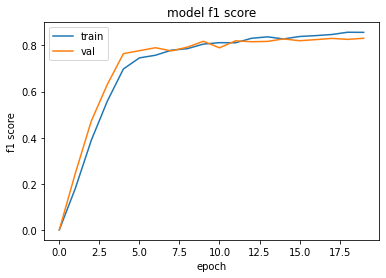

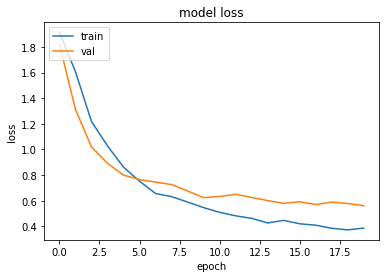

In [114]:
# Plotting the model performance
plt.plot(history.history['get_f1'])
plt.plot(history.history['val_get_f1'])

plt.title('model f1 score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [113]:
# Model performance on training data
print(classification_report(y_true = y_train,y_pred = model_fin.predict_classes(X_train_fin)))
print(confusion_matrix(y_true = y_train,y_pred = model_fin.predict_classes(X_train_fin)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        68
           1       0.92      0.93      0.92       301
           2       0.87      1.00      0.93        66
           3       0.98      0.95      0.96       541
           4       0.90      0.91      0.90       370
           5       0.86      0.89      0.87       283
           6       0.90      0.86      0.88       480

    accuracy                           0.91      2109
   macro avg       0.89      0.93      0.91      2109
weighted avg       0.91      0.91      0.91      2109

[[ 68   0   0   0   0   0   0]
 [  2 279   0   2   4   6   8]
 [  0   0  66   0   0   0   0]
 [  2   2   3 512   7   1  14]
 [  6   4   4   1 335   8  12]
 [  2  12   0   2   3 251  13]
 [  2   7   3   6  24  26 412]]


In [116]:
# Model performance on test data
print(classification_report(y_true = y_test,y_pred = model_fin.predict_classes(X_test_fin)))
print(confusion_matrix(y_true = y_test,y_pred = model_fin.predict_classes(X_test_fin)))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.88      0.92      0.90        38
           2       0.70      0.88      0.78         8
           3       1.00      0.90      0.95        68
           4       0.71      0.91      0.80        46
           5       0.71      0.67      0.69        36
           6       0.84      0.68      0.75        60

    accuracy                           0.82       264
   macro avg       0.78      0.83      0.80       264
weighted avg       0.83      0.82      0.82       264

[[ 7  0  0  0  1  0  0]
 [ 0 35  0  0  1  1  1]
 [ 1  0  7  0  0  0  0]
 [ 2  0  1 61  2  0  2]
 [ 1  0  1  0 42  1  1]
 [ 0  2  0  0  6 24  4]
 [ 0  3  1  0  7  8 41]]


### Persisting Model-2 (for later use)

In [117]:
# Persisting tokenizer
with open('tokenizer.dill','wb') as f:
    dill.dump(tokenizer, f)

# Persisting Label Encoder
with open('encoder.dill','wb') as f:
    dill.dump(encoder, f)

# Persisting lemmatizer
with open('lemmatizer.dill','wb') as f:
    dill.dump(lemmatizer, f)

# Persisting model 
model_fin.save('bi-lstm')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: bi-lstm/assets


In [119]:
# Command for loading saved model
# reloaded_model = load_model('bi-lstm', custom_objects= {'get_f1': get_f1})

## Model-3 (BERT-Uncased fine-tuned for Text Classification) 

In [141]:
print("Train data shape: X = {}, y = {}".format(X_train.shape, y_train.shape))
print("Validation data shape: X = {}, y = {}".format(X_val.shape, y_val.shape))
print("Test data shape: X = {}, y = {}".format(X_test.shape, y_test.shape))

Train data shape: X = (2109,), y = (2109,)
Validation data shape: X = (261,), y = (261,)
Test data shape: X = (264,), y = (264,)


### Create tf.data.Datasets for Training and Evaluation

In [143]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
  valid_data = tf.data.Dataset.from_tensor_slices((X_val, y_val))
  test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [144]:
# Data check
for text,label in train_data.take(1):
  print(text)
  print(label)

tf.Tensor(b'central bank of india recruitment job alert fresh vacancy announced check detail', shape=(), dtype=string)
tf.Tensor(2, shape=(), dtype=int64)


### Fetching Pre-trained BERT Uncased Model from TensorFlow Hub

In [145]:
"""
- Input data needs to be transformed to BERT input features:
input_word_ids, input_mask, segment_ids
- BERT model tokenizer is used to tokenize the input data
"""

label_list = [0,1,2,3,4,5,6] # Label categories
max_seq_length = 39 # maximum length of (token) input sequences
train_batch_size = 32


# Fetching BERT layer and tokenizer:
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2', trainable=True)

# Fetching BERT tokenizer's vocabulary file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

### Tokenize and Preprocess Text for BERT

In [146]:
# Function to convert row to BERT input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid=None, text_a = text.numpy(), text_b = None, label=label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)

  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [147]:
# Wrapper function; needed to apply to_feature() to each element of the input data
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label],
                                                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
      'input_word_ids': input_ids,
       'input_mask': input_mask,
       'input_type_ids': segment_ids

  }

  return (x, label_id)

### Creating TensorFlow Input Pipeline with `tf.data`

In [148]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .shuffle(500)
  .batch(32) # , drop_remainder=True
  .prefetch(tf.data.experimental.AUTOTUNE)) # pre-fetching input data for pre-processing to optimize runtime and resource utilization

  # valid
  valid_data = (valid_data.map(to_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .batch(32) # , drop_remainder=True
  .prefetch(tf.data.experimental.AUTOTUNE))

  # test
  test_data = (test_data.map(to_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .batch(32) # , drop_remainder=True
  .prefetch(tf.data.experimental.AUTOTUNE))
  

In [149]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None)},
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [150]:
# valid data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None)},
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [151]:
# test data spec
test_data.element_spec

({'input_mask': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None)},
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

### Adding a Classification Head to the BERT Layer

In [152]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="input_type_ids")
  
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  # Using pooled output from BERT layer 
  drop = tf.keras.layers.Dropout(0.4)(pooled_output) # Dropout layer to avoid overfitting
  output = tf.keras.layers.Dense(7, activation='softmax', name='output')(drop) # Classification layer

  model = tf.keras.Model(
      inputs={
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids
      },
      outputs=output
  )
  return model

### Fine-Tuning BERT for Multi-Class Text Classification

In [176]:
# Creating model
model = create_model()

# Using Sparse Categorical Cross Entropy loss as the input target labels are being passed as integers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 39)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 39)]         0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 39)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

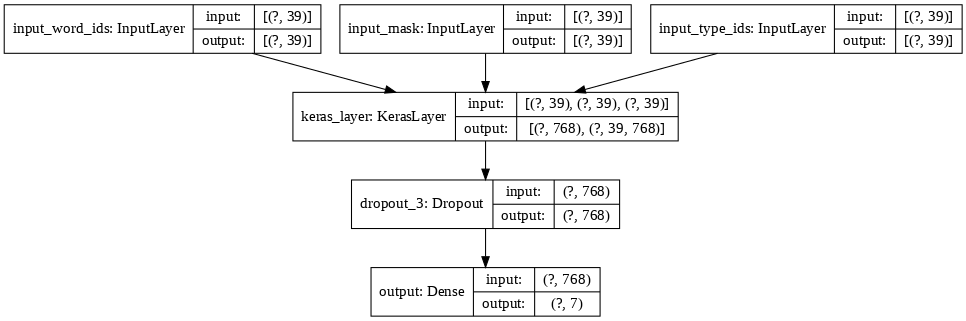

In [177]:
# Plotting the model
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76)

In [178]:
# Model training
epochs = 2
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

Epoch 1/2
66/66 [==============================] - 12s 180ms/step - loss: 0.3263 - sparse_categorical_accuracy: 0.9208 - val_loss: 0.5141 - val_sparse_categorical_accuracy: 0.8812
Epoch 2/2
66/66 [==============================] - 11s 170ms/step - loss: 0.0627 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.5201 - val_sparse_categorical_accuracy: 0.8966


### Model-3 Performance evaluation

In [179]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

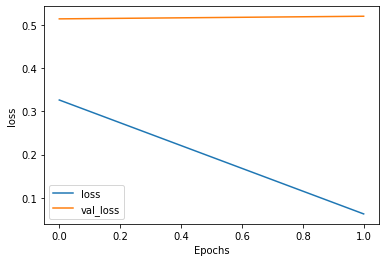

In [180]:
plot_graphs(history, 'loss')

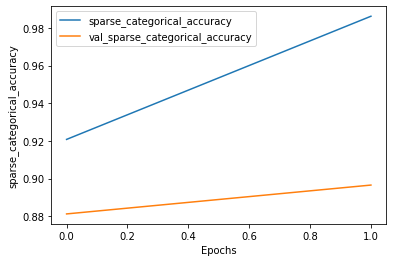

In [181]:
plot_graphs(history, 'sparse_categorical_accuracy')

In [182]:
# Validation set performance
targ = []
for example in valid_data:
  for i in example[1]:
    targ.append(i.numpy())
print(len(targ))

261


In [184]:
val_pred = model.predict(valid_data)
valid_class = [np.argmax(pred) for pred in val_pred]

In [186]:
print(classification_report(y_true = targ,y_pred = valid_class))
print(confusion_matrix(y_true = targ,y_pred = valid_class))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.94      0.89      0.92        37
           2       0.80      1.00      0.89         8
           3       0.94      0.90      0.92        67
           4       0.88      0.93      0.91        46
           5       0.86      0.86      0.86        35
           6       0.87      0.92      0.89        60

    accuracy                           0.90       261
   macro avg       0.90      0.87      0.88       261
weighted avg       0.90      0.90      0.90       261

[[ 5  0  2  1  0  0  0]
 [ 0 33  0  1  1  1  1]
 [ 0  0  8  0  0  0  0]
 [ 0  2  0 60  2  1  2]
 [ 0  0  0  0 43  1  2]
 [ 0  0  0  0  2 30  3]
 [ 0  0  0  2  1  2 55]]


In [187]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(targ, valid_class)

0.8744294874938242

In [188]:
# Test set performance
test_targ = []
for example in test_data:
  for i in example[1]:
    test_targ.append(i.numpy())
print(len(test_targ))

264


In [189]:
test_pred = model.predict(test_data)
test_class = [np.argmax(pred) for pred in test_pred]

In [190]:
print(classification_report(y_true = test_targ,y_pred = test_class))
print(confusion_matrix(y_true = test_targ,y_pred = test_class))
print(balanced_accuracy_score(test_targ, test_class))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.92      0.87      0.89        38
           2       1.00      1.00      1.00         8
           3       0.95      0.93      0.94        68
           4       0.87      0.87      0.87        46
           5       0.66      0.81      0.73        36
           6       0.79      0.75      0.77        60

    accuracy                           0.85       264
   macro avg       0.86      0.85      0.86       264
weighted avg       0.85      0.85      0.85       264

[[ 6  0  0  0  1  1  0]
 [ 0 33  0  1  1  1  2]
 [ 0  0  8  0  0  0  0]
 [ 1  0  0 63  1  0  3]
 [ 0  1  0  1 40  2  2]
 [ 0  1  0  0  1 29  5]
 [ 0  1  0  1  2 11 45]]
0.8528589162591047


### Function for incoming data prediction

In [215]:
# Function for predicting news category basis incoming News Title (see example at bottom of this cell to see how to invoke the function (input: string))
def pred_news_category(title):
  text = np.array([title])
  pred_data = tf.data.Dataset.from_tensor_slices((text, [0]*len(text)))
  pred_data = (pred_data.map(to_feature_map).batch(1))
  preds = model.predict(pred_data)
  predicted_class = [np.argmax(pred) for pred in preds]
  return categories.loc[categories['id'] == encoder.classes_[predicted_class[0]],'category'].values[0]

# pred_news_category('fairfield by marriott xae open it th property worldwide with newest location in denver the mile high city')

In [219]:
# Saving model
export_dir = './bert_model'
model.save(export_dir)

INFO:tensorflow:Assets written to: ./bert_model/assets


INFO:tensorflow:Assets written to: ./bert_model/assets


In [ ]:
# # Loading saved model (for check purposes)
# reloaded_model = tf.keras.models.load_model(export_dir)

In [ ]:
# # Checking if the model has been loaded correctly
# reloaded_preds = reloaded_model.predict(test_data)
# reloaded_predicted_class = [np.argmax(pred) for pred in reloaded_preds]

# assert test_class == reloaded_predicted_class

In [220]:
# # Compressing the saved model
# !zip -r /content/file.zip /content/bert_model

In [ ]:
# # Downloading compressed saved model
# from google.colab import files
# files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>